Pearson correlation coefficient: 0.107
Saved figure to c:\Users\mit\Desktop\Finaaal\reports\figures\q10_height_vs_rank.png


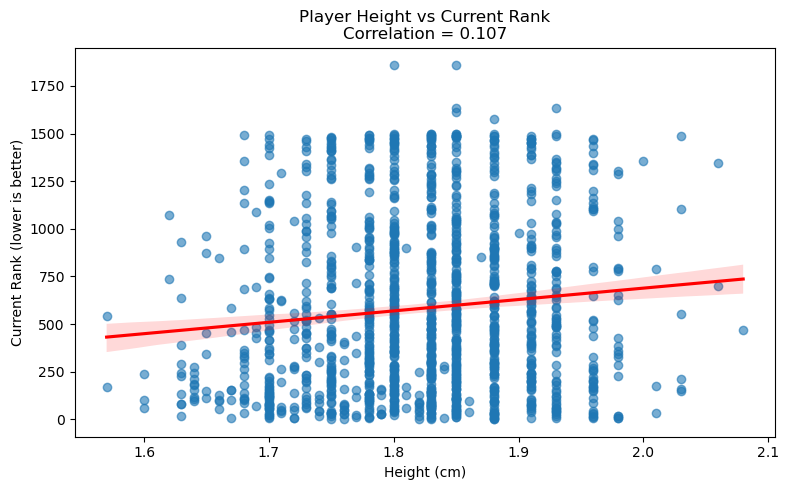

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

project_root = Path.cwd().parent
processed_dir = project_root / "data" / "processed"
figures_dir = project_root / "reports" / "figures"
figures_dir.mkdir(parents=True, exist_ok=True)

file_path = processed_dir / "players_height_by_gender.parquet"
df = pd.read_parquet(file_path)

# حذف مقادیر NaN
data = df[['height', 'current_rank']].dropna()

# محاسبه همبستگی پیرسون
corr = data['height'].corr(data['current_rank'], method='pearson')
print(f"Pearson correlation coefficient: {corr:.3f}")

plt.figure(figsize=(8, 5))
sns.regplot(
    x='height',
    y='current_rank',
    data=data,
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'}
)
plt.title(f'Player Height vs Current Rank\nCorrelation = {corr:.3f}')
plt.xlabel("Height (cm)")
plt.ylabel("Current Rank (lower is better)")

output_figure_path = figures_dir / "q10_height_vs_rank.png"
plt.tight_layout()
plt.savefig(output_figure_path, dpi=300)
print(f"Saved figure to {output_figure_path}")

plt.show()


In [ ]:
import pandas as pd
from scipy.stats import pearsonr
from pathlib import Path

project_root = Path.cwd().parent
processed_dir = project_root / "data" / "processed"
answers_dir = project_root / "reports" / "answers"
answers_dir.mkdir(parents=True, exist_ok=True)

file_path = processed_dir / "players_height_by_gender.parquet"
df = pd.read_parquet(file_path)

df = df.dropna(subset=["height", "current_rank"])

# محاسبه ضریب همبستگی پیرسون و p-value
r_value, p_value = pearsonr(df["height"], df["current_rank"])

print(f"Pearson correlation coefficient: {r_value:.3f}")
print(f"P-value: {p_value:.6f}")

output_path = answers_dir / "q10_correlation.csv"
pd.DataFrame({
    "pearson_r": [round(r_value, 6)],
    "p_value": [round(p_value, 6)]
}).to_csv(output_path, index=False, encoding="utf-8-sig")

print(f"Saved correlation results to {output_path}")


Pearson correlation coefficient: 0.107
P-value: 0.000084
Saved correlation results to c:\Users\mit\Desktop\Finaaal\reports\answers\q10_correlation.csv
